# A simple heuristic is evaluated as a baseline

Rules (this is also a kind of human bootstraped clustering approach):
- r1: only look at Pre-A/B companies
- r2: the latest funding shall not be older than 6 months
- r3: the latest funding shall not be less than 50000 USD
- r4: the ratio of latest fund over the entire funding shall be over 50%
- r5: only return groups (no standalone company is allowed, i.e. group size > 20) of companies who are similar (similarity distance > 0.5)

In [1]:
# load precessed training dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_pickle("../data/train.pkl")
df[df['investor_names_concat'].notnull()].loc[[563740]].transpose()

,563740
company_name,PCD Partners
homepage_url,com
country_code,USA
city,Lebanon
short_description,PCD Partners is a group of world class physici...
description,PCD Partners is a group of world class physici...
employee_count,1-10
weeks_founded,405.143
company_uuid,9fc2313a-05e8-16cb-9094-3a0ba11baec8
weeks_founded_quant,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


## Filter on the rules

In [2]:
#r1
df = df[df['invest_phase_overall'].apply(lambda x: x == [0, 1])]
print(df.shape)
df.head(n=2)

(500195, 31)


,company_name,homepage_url,country_code,city,short_description,description,employee_count,weeks_founded,company_uuid,weeks_founded_quant,...,funding_total_usd,funding_total_usd_quant,funding_rounds,last_funding_week,last_funding_week_quant,last_funding_usd,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp
0,BN Media,com,,,BN Media is an entity that features three cros...,The mission of BN Media is to serve the vast o...,11-50,457.285714,51d72ce7-3075-b4d9-941f-8a90b23c9c14,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
1,BSN Glasspack,com,,,The second-largest glass container maker in Eu...,NaN,unknown,979.142857,62a90659-df0d-0ff8-c30e-b393bdbbb490,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1


In [3]:
#r2
df = df[df['last_funding_week'] <= 6]
print(df.shape)
df.head(n=2)

(1940, 31)


,company_name,homepage_url,country_code,city,short_description,description,employee_count,weeks_founded,company_uuid,weeks_founded_quant,...,funding_total_usd,funding_total_usd_quant,funding_rounds,last_funding_week,last_funding_week_quant,last_funding_usd,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp
550,Virtuleap,com,PRT,Lisbon,VR Brain Training for Cognitive Health,Virtuleap's VR brain training app offers a dai...,1-10,35.714286,b0ac15fc-b536-1e6d-53a5-e8bbf68d5f17,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,175000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1.098612,1.714286,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",125000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.714286,0
606,IFDAQ,com,AUT,Vienna,The IFDAQ is a powerful AI-system that provide...,The IFDAQ (International Fashion Digital Autom...,11-50,538.142857,69862529-f1f9-d94c-56b9-feb80adea309,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1.609438,0.857143,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1]",-1.000000,1


In [4]:
#r3
df = df[df['last_funding_usd'] > 50000]
print(df.shape)
df.head(n=2)

(1179, 31)


,company_name,homepage_url,country_code,city,short_description,description,employee_count,weeks_founded,company_uuid,weeks_founded_quant,...,funding_total_usd,funding_total_usd_quant,funding_rounds,last_funding_week,last_funding_week_quant,last_funding_usd,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp
550,Virtuleap,com,PRT,Lisbon,VR Brain Training for Cognitive Health,Virtuleap's VR brain training app offers a dai...,1-10,35.714286,b0ac15fc-b536-1e6d-53a5-e8bbf68d5f17,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,175000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1.098612,1.714286,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",125000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.714286,0
1378,Hongxin,,CHN,Beijing,Hongxin is a Social Networking company.,NaN,unknown,144.285714,b4eead3d-b764-4748-8fc4-e50d6a973021,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",...,1462844.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0.693147,4.285714,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1462844.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0


In [5]:
#r4
df = df[df['last_funding_ratio'] > 0.5]
print(df.shape)
df.head(n=2)

(992, 31)


,company_name,homepage_url,country_code,city,short_description,description,employee_count,weeks_founded,company_uuid,weeks_founded_quant,...,funding_total_usd,funding_total_usd_quant,funding_rounds,last_funding_week,last_funding_week_quant,last_funding_usd,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp
550,Virtuleap,com,PRT,Lisbon,VR Brain Training for Cognitive Health,Virtuleap's VR brain training app offers a dai...,1-10,35.714286,b0ac15fc-b536-1e6d-53a5-e8bbf68d5f17,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,175000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1.098612,1.714286,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",125000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.714286,0
1378,Hongxin,,CHN,Beijing,Hongxin is a Social Networking company.,NaN,unknown,144.285714,b4eead3d-b764-4748-8fc4-e50d6a973021,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",...,1462844.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0.693147,4.285714,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1462844.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0


In [6]:
#r5: Semantic Similarity
import pickle
infile = open('../model/semdb_model.pkl','rb')
model = pickle.load(infile)
infile.close()

In [7]:
from bfs import filter_on_similarity
focus_orgs = filter_on_similarity(df, model, 0.5)
print('Found {} groups of companies that may be of interest!'.format(len(focus_orgs)))

BFSing ...
Found 8 groups of companies that may be of interest!


## Evaluate the obtained company groups
Notice how suprising that it categorise the AI, Quamtum computing, and IOT together in group 3

In [8]:
# Sample 3 companies for each group
frames = []
seq_no = 1
for group in focus_orgs:
    n = len(group)
    # idx = np.random.choice(n, 3, replace=False)
    print('Group {}: Total {} companies.'.format(seq_no, n))
    # focus_orgs_list = focus_orgs_list.union(group)
    print(df.loc[list(group)[:3]]['short_description'].to_string())
    
    tmp = pd.DataFrame(list(group), columns =['id'])
    tmp['group'] = [seq_no for _ in range(n)]
    frames.append(tmp)
    
    seq_no += 1
    
focus_orgs_df = pd.concat(frames)

Group 1: Total 62 companies.
168192    Quadrant Biosciences is a company dedicated to...
187904    Nanoscope Technologies is a company develop ne...
522370                Grenova is a Biotechnology   Company.
Group 2: Total 50 companies.
263685    The app that helps you maximize your time by i...
531849                     The next generation of shapewear
160906    Tackling humanity's greatest challenges with t...
Group 3: Total 38 companies.
45440     Derq uses AI to power an award-winning predict...
156036    Kunak designs and commercializes products and ...
443269    Internet of Things for Concrete Testing, Concr...
Group 4: Total 34 companies.
204933    The Public Investment Fund (PIF) facilitates t...
31626                               Fintech - Loan Services
466059    Token IQ is a leading SaaS blockchain technolo...
Group 5: Total 36 companies.
375810    Cool Towels are 100% cotton towels that are pr...
537604    Better Planet Paper is a  consumer paper brand...
243592    Pani 

In [9]:
sembd = pd.DataFrame(model.sv.vectors[list(focus_orgs_df['id']), :])
sembd.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.010541,-0.148105,-0.025119,0.064863,0.027552,-0.212454,0.163868,0.027970,-0.270866,0.064542,...,0.110811,-0.143723,-0.185825,0.102620,0.059302,0.164719,0.018781,-0.174053,-0.038469,-0.034038
1,0.033071,0.101113,-0.136428,0.268523,0.058057,-0.419491,0.115395,-0.208501,-0.113697,0.182634,...,0.043302,-0.082146,-0.059290,0.158601,-0.044622,0.180390,-0.045756,-0.289873,0.095339,-0.051579
2,-0.027615,0.068679,-0.054938,0.264164,-0.254665,0.084267,0.132848,-0.074527,-0.232467,0.035850,...,0.026116,-0.144981,0.036803,0.092494,0.100727,0.245418,0.043083,-0.171173,-0.066386,-0.052604
3,-0.062879,-0.029601,0.015288,0.009561,-0.226506,-0.003742,0.292173,-0.095399,-0.129103,-0.077138,...,-0.008074,-0.056122,-0.079174,0.258881,0.052801,0.183725,0.060392,-0.045713,-0.078216,0.085547
4,0.003762,0.091466,0.074713,0.281485,-0.053725,-0.306927,0.148996,-0.098996,0.051821,0.101131,...,0.015675,-0.051452,0.076546,0.053463,-0.096266,0.173219,0.062519,-0.048220,0.212948,-0.007179


In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_res = tsne.fit_transform(sembd)
res_pd = pd.DataFrame(tsne_res)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 319 samples in 0.001s...
[t-SNE] Computed neighbors for 319 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 319 / 319
[t-SNE] Mean sigma: 0.539042
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.733971
[t-SNE] KL divergence after 1000 iterations: 0.692716


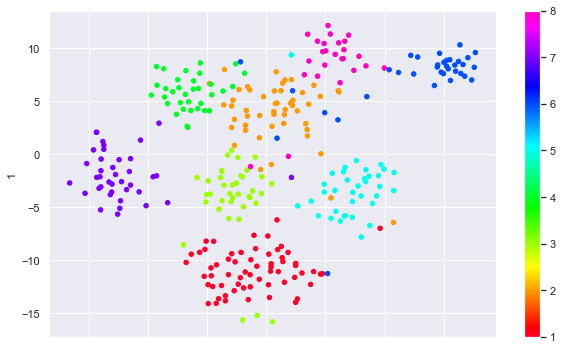

In [33]:
#visualize the embedding color coded by group
colors = focus_orgs_df['group']
res_pd.plot.scatter(x=0, y=1, c=colors, colormap='gist_rainbow')

## Test on the hold-out data
i.e. Inspect how does the selected companies do in the future concerning obtaining investments.
Question to answer: 
- among all the new funding, how much is brought over by the identified group?
- how much better than average?
- among the selected ones, how many actually received funds afterwards?

In [12]:
# Query the total investment in the hold out data
sql = """
SELECT
  SUM(raised_amount_usd)
FROM
  `proj.leleca.mbt_funding`
WHERE
  announced_on > "2018-10-07"
"""
usd_sum_holdout = 491490999439

# Query the total number of companies involved in the hold data
sql = """
SELECT
  COUNT(DISTINCT(company_uuid))
FROM
  `king-ml-platform-dev.leleca.mbt_funding`
WHERE
  announced_on > "2018-10-07"
"""
n_orgs_holdout = 27609
print('Average obtained USD per company over all companies = {}'.format(usd_sum_holdout/n_orgs_holdout))

Average obtained USD per company over all companies = 17801839.959397297


In [24]:
# Only consider the companies in early stages
from trans_func import process_founded, process_investment_type
dff = pd.read_json('../data/funding.json', lines = True)
dff['weeks_announced']=dff['announced_on'].apply(process_founded)
dff = dff[dff['weeks_announced'] < 0]
dff['invest_phase']=dff['investment_type'].apply(process_investment_type)
dff = dff[dff['invest_phase'].apply(lambda x: x == [1, 0, 0])]
usd_sum_holdout_preab = dff['raised_amount_usd'].sum()
n_orgs_holdout_preab = len(dff)
avg_original = usd_sum_holdout_preab/n_orgs_holdout_preab
print(n_orgs_holdout_preab, usd_sum_holdout_preab, avg_original)

14119 22460304700.0 1590785.7992775692


In [31]:
uuid_holdout = list(df.loc[list(focus_orgs_df['id'])]['company_uuid'])
sql = """
SELECT
  SUM(raised_amount_usd)
FROM
  `king-ml-platform-dev.leleca.mbt_funding`
WHERE
  announced_on > "2018-10-07"
  AND company_uuid IN ("{}")
""".format('","'.join(map(str, uuid_holdout)))
print(sql)
usd_sum_holdout_selected = 459985907
n_orgs_holdout_selected = 99 # len(uuid_holdout)
print('Selected companies ({}) obtain a total of USD = {}'.format(n_orgs_holdout_selected, usd_sum_holdout_selected))


SELECT
  SUM(raised_amount_usd)
FROM
  `king-ml-platform-dev.leleca.mbt_funding`
WHERE
  announced_on > "2018-10-07"
  AND company_uuid IN ("ce12683e-e559-4a5d-b3d2-8977542d331d","0a1ba6bb-dcff-4891-bbe5-98a29974acf9","735a44cd-369d-4c12-adea-096c08440706","3c4e33fe-dc5e-47d4-b1f0-0f267139946f","79d4eec3-9dbf-4205-be13-9275ceb2e55a","1bf6ae0b-8fa7-4c45-b5e8-caf3783f8274","d8440f8a-3e0b-bb00-978d-f0d22dab3d6a","8569696e-d241-4019-846a-0c05005132ce","fc9c4828-9c9a-4a80-8d90-e80ed5bfb7f6","70805547-adcf-4790-adc6-e143da22a840","d51029fd-1679-41a9-b438-7effa7e16d79","3e38576d-be24-4c7c-9a76-68c25dbb9100","3d1be8f4-fe0d-43d2-af33-473978ac9948","b4ab65bc-d25d-c615-8aeb-91f72ba53fc6","34d8d6af-3027-4122-9956-9da9338bd585","2959a512-4250-4708-a8a3-85c0f3e9019e","e4fc1ac1-90e0-48be-91b1-1217d9b9f91a","56204e23-2403-4a99-0c62-cf1b168bc1d7","3380e482-ef00-2f31-bc48-f34c0a64a066","c1173f02-ecdd-bed0-55d8-d7914e5c3ac9","68663ca1-a9f4-43b2-8201-d1843541adad","4d68fb53-b6cc-91e1-abfb-0affe26f11aa","

In [30]:
print('1. Percentage of USD for the selected companies: {} %'.format(usd_sum_holdout_selected*100/usd_sum_holdout_preab))
avg_selected = usd_sum_holdout_selected/n_orgs_holdout_selected
print('2. Average USD for the selected companies: {}, which is {} times of average.'.format(
    avg_selected, avg_selected/avg_original))
print('3. Among the selcted companies, {} % actually received funds afterwards.'.format(n_orgs_holdout_selected*100/len(uuid_holdout)))

1. Percentage of USD for the selected companies: 2.047994954405049 %
2. Average USD for the selected companies: 4646322.292929293, which is 2.9207717940651396 times of average.
3. Among the selcted companies, 31.03448275862069 % actually received funds afterwards.
